In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PART 2

# MLP for classification

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [73]:
file_path = "/content/drive/MyDrive/Colab_Notebooks/deep_cs671/assignment1/digit_data.csv"
data  = pd.read_csv(file_path)
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:8400].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[8400:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

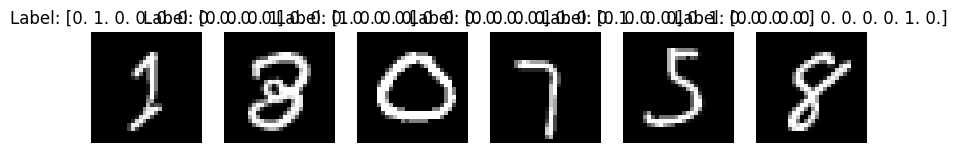

In [169]:
def plot_sample_images(X_train, Y_train, num_samples=6):
    plt.figure(figsize=(10, 4))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {Y_train[i]}")
        plt.axis('off')
    plt.show()

plot_sample_images(X_train, Y_train, num_samples=6)

In [123]:
data.shape
print(data_dev.shape)
print(Y_dev.shape)
print(X_dev.shape)
print(data_train.shape)
print(Y_train.shape)
print(X_train.shape)

(785, 8400)
(8400,)
(784, 8400)
(785, 33600)
(33600,)
(784, 33600)


In [137]:
def init_params():
  w1=np.random.rand(64,784)-0.5
  b1=np.random.rand(64,1)-0.5
  w2=np.random.rand(10,64)-0.5
  b2=np.random.rand(10,1)-0.5
  return w1,b1,w2,b2

def ReLu(x):
  return np.maximum(x,0)

def ReLu_deriv(x):
  return x>0

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

def forward_prop(w1,b1,w2,b2,x):
  z1=w1.dot(x)+b1
  a1=ReLu(z1)
  z2=w2.dot(a1)+b2
  a2=softmax(z2)
  return z1,a1,z2,a2

def one_hot(y):

    y = y.astype(np.int64).ravel()
    m = len(y)
    n_classes = 10
    one_hot_y = np.zeros((m, n_classes))


    for i in range(m):
        one_hot_y[i, y[i]] = 1
    return one_hot_y.T

def back_prop(z1,a1,z2,a2,w1,w2,x,y):
  # one_hot_y=one_hot(y)
  m=x.shape[1]
  dz2=a2-y
  dw2=(1/m)*dz2.dot(a1.T)
  db2=(1/m)*np.sum(dz2)
  dz1=w2.T.dot(dz2)*ReLu_deriv(z1)
  dw1=(1/m)*dz1.dot(x.T)
  db1=(1/m)*np.sum(dz1)
  return dw1,db1,dw2,db2

def param_update(w1,b1,w2,b2,dw1,db1,dw2,db2,lr):
  w1=w1-lr*dw1
  b1=b1-lr*db1
  w2=w2-lr*dw2
  b2=b2-lr*db2
  return w1,b1,w2,b2


In [125]:
def get_pred(a2):
  return np.argmax(a2,0)

def accuracy(pred,y):
  print(pred,y)
  return np.sum(pred==y)/y.size



In [132]:
y=one_hot(Y_train)
y[0]

array([0., 0., 1., ..., 0., 0., 0.])

In [127]:
def compute_loss(y_pred,y_true):
  m = y_true.shape[0]


  loss = (-1/m) * np.sum(y_true*np.log(y_pred+1e-9))
  return loss

In [139]:
def gradient_descent(x,y,lr,epochs):
  # y=one_hot(y)
  w1,b1,w2,b2=init_params()

  # losses=[]
  accuracies=[]
  for i in range(epochs):
    z1,a1,z2,a2=forward_prop(w1,b1,w2,b2,x)
    # loss=compute_loss(a2,y)
    # losses.append(loss)
    predictions=get_pred(a2)
    acc=accuracy(predictions, np.argmax(y, axis=0))
    accuracies.append(acc)
    # acc=accuracy(predictions,y)
    # accuracies.append(accuracy(predictions,y))
    dw1,db1,dw2,db2=back_prop(z1,a1,z2,a2,w1,w2,x,y)
    w1,b1,w2,b2=param_update(w1,b1,w2,b2,dw1,db1,dw2,db2,lr)
    if i%10==0:
      print(f"epoch{i} - loss:{loss:.4f},accuracy:{accuracies[i]}")
  return w1,b1,w2,b2,losses,accuracies

In [140]:

print("Y_train dtype:", Y_train.dtype)
print("Y_train sample values:", Y_train[:10])
print("Y_train shape:", Y_train.shape)
print("xtrain shape:",X_train.shape)
Y_train_encoded = one_hot(Y_train)
print("X_train shape:", X_train.shape)
print("Y_train_encoded shape:", Y_train_encoded.shape)
w1,b1,w2,b2,losses,accuracies = gradient_descent(X_train,Y_train_encoded,0.10,500)

Y_train dtype: int64
Y_train sample values: [1 3 0 7 5 8 1 5 2 7]
Y_train shape: (33600,)
xtrain shape: (784, 33600)
X_train shape: (784, 33600)
Y_train_encoded shape: (10, 33600)
[6 9 9 ... 4 6 6] [1 3 0 ... 6 1 8]
epoch0 - loss:22643.5067,accuracy:0.08107142857142857
[9 0 9 ... 4 3 1] [1 3 0 ... 6 1 8]
[8 0 9 ... 4 3 1] [1 3 0 ... 6 1 8]
[1 0 9 ... 4 3 1] [1 3 0 ... 6 1 8]
[1 0 9 ... 4 3 1] [1 3 0 ... 6 1 8]
[1 0 9 ... 4 3 1] [1 3 0 ... 6 1 8]
[1 0 9 ... 4 3 1] [1 3 0 ... 6 1 8]
[1 0 9 ... 4 3 1] [1 3 0 ... 6 1 8]
[1 0 9 ... 4 3 1] [1 3 0 ... 6 1 8]
[1 0 0 ... 4 1 1] [1 3 0 ... 6 1 8]
[1 0 0 ... 4 1 1] [1 3 0 ... 6 1 8]
epoch10 - loss:6949.5352,accuracy:0.36473214285714284
[1 0 0 ... 4 1 1] [1 3 0 ... 6 1 8]
[1 0 0 ... 4 1 1] [1 3 0 ... 6 1 8]
[1 0 0 ... 4 1 1] [1 3 0 ... 6 1 8]
[1 0 0 ... 4 1 1] [1 3 0 ... 6 1 8]
[1 0 0 ... 4 1 1] [1 3 0 ... 6 1 8]
[1 0 0 ... 4 1 1] [1 3 0 ... 6 1 8]
[1 8 0 ... 4 1 1] [1 3 0 ... 6 1 8]
[1 8 0 ... 4 1 1] [1 3 0 ... 6 1 8]
[1 8 0 ... 4 1 1] [1 3 0 ...

In [104]:
print(accuracies)

[0.08357142857142857, 0.11226190476190476, 0.13229166666666667, 0.15467261904761906, 0.18014880952380952, 0.20717261904761905, 0.23589285714285715, 0.2642559523809524, 0.29270833333333335, 0.3187797619047619, 0.34154761904761904, 0.36282738095238093, 0.3825595238095238, 0.4010714285714286, 0.4187797619047619, 0.43416666666666665, 0.44970238095238096, 0.4650297619047619, 0.47791666666666666, 0.49083333333333334, 0.5032738095238095, 0.5151488095238095, 0.5261904761904762, 0.5361904761904762, 0.5455059523809523, 0.5551785714285714, 0.5643154761904762, 0.5726190476190476, 0.5808630952380952, 0.589047619047619, 0.5954761904761905, 0.6019345238095238, 0.6086607142857143, 0.6148809523809524, 0.6213988095238095, 0.6270833333333333, 0.632827380952381, 0.6388690476190476, 0.643720238095238, 0.6483928571428571, 0.6535714285714286, 0.657172619047619, 0.6616071428571428, 0.6659226190476191, 0.6699404761904761, 0.6735714285714286, 0.6771428571428572, 0.6806845238095238, 0.6839583333333333, 0.6871428

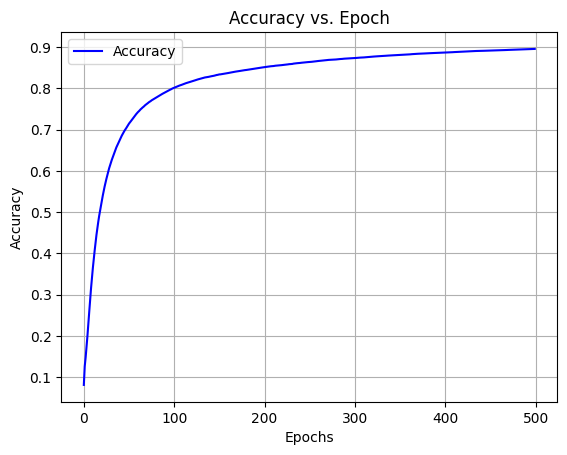

In [143]:
plt.plot(range(500), accuracies, label="Accuracy", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epoch")
plt.legend()
plt.grid()
plt.show()

In [81]:
def make_predictions(x,w1,b1,w2,b2):
  _, _, _, a2 = forward_prop(w1,b1,w2,b2,x)
  predictions = get_pred(a2)
  return predictions

In [82]:
def test_prd(index,w1,b1,w2,b2,x_train,y_train):
  current_image = x_train[:,index,None]
  prediction = make_predictions(current_image,w1,b1,w2,b2)
  label = y_train[index]
  print("Prediction: ", prediction)
  print("Label: ", label)

  current_image = current_image.reshape((28,28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.title(f"Predicted:{prediction[0]},actual:{label}")
  plt.show()

Prediction:  [7]
Label:  7


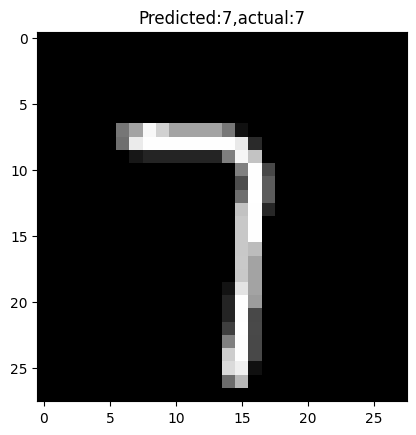

In [85]:
test_prd(3,w1,b1,w2,b2,X_train,Y_train)

In [145]:
test_prediction = make_predictions(X_dev,w1,b1,w2,b2)
test_accuracy = accuracy(test_prediction,Y_dev)
print(test_accuracy)


[2 4 6 ... 8 8 1] [2 4 6 ... 8 8 1]
0.8869047619047619


[2 4 6 ... 8 8 1]
[2 4 6 ... 8 8 1]
(8400,)


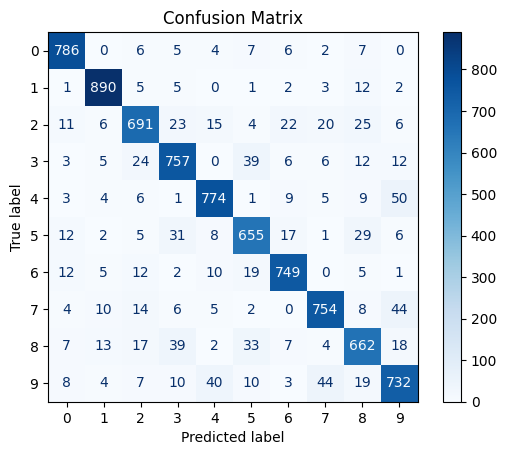

In [144]:
y_pred=make_predictions(X_dev,w1,b1,w2,b2)
print(y_pred)
print(Y_dev)
print(y_pred.shape)
Y_dev.shape
cm=confusion_matrix(Y_dev,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# CNN for classification

In [147]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [153]:

Y_train = data_train[0, :]
X_train = data_train[1:, :]
Y_dev = data_dev[0, :]
X_dev = data_dev[1:, :]
X_train = X_train.T
X_dev = X_dev.T
X_train = X_train.reshape(-1, 28, 28, 1)
X_dev = X_dev.reshape(-1, 28, 28, 1)

Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_dev = tf.keras.utils.to_categorical(Y_dev, 10)

X_train, X_dev = X_train / 255.0, X_dev / 255.0


In [158]:
from sklearn.model_selection import train_test_split
X_train_new, X_test, Y_train_new, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# # Print shapes to verify
# print("New Training Data Shape:", X_train_new.shape)
# print("Validation Data Shape:", X_dev.shape)  # Already exists
# print("New Test Data Shape:", X_test.shape)


In [159]:
X_train[456]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [160]:
import tensorflow as tf
import matplotlib.pyplot as plt
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [161]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [163]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=250, validation_data=(X_dev, Y_dev))

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 106s 779ms/step - accuracy: 0.9531 - loss: 0.1588 - val_accuracy: 0.9744 - val_loss: 0.0832
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 129s 681ms/step - accuracy: 0.9822 - loss: 0.0602 - val_accuracy: 0.9789 - val_loss: 0.0685
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 140s 668ms/step - accuracy: 0.9882 - loss: 0.0384 - val_accuracy: 0.9806 - val_loss: 0.0669
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 142s 667ms/step - accuracy: 0.9909 - loss: 0.0282 - val_accuracy: 0.9811 - val_loss: 0.0652
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 141s 660ms/step - accuracy: 0.9943 - loss: 0.0187 - val_accuracy: 0.9815 - val_loss: 0.0620
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 89s 661ms/step - accuracy: 0.9966 - loss: 0.0124 - val_accuracy: 0.9825 - val_loss: 0.0670
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 142s 663ms/step - accuracy: 0.9970 - loss: 0.0091 - val_accuracy: 0.9807 - val_loss: 0.0733
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 142s 662ms/step - accuracy: 0.9965 - 

In [164]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

210/210 - 4s - 19ms/step - accuracy: 0.9979 - loss: 0.0051


Test Accuracy: 0.9979


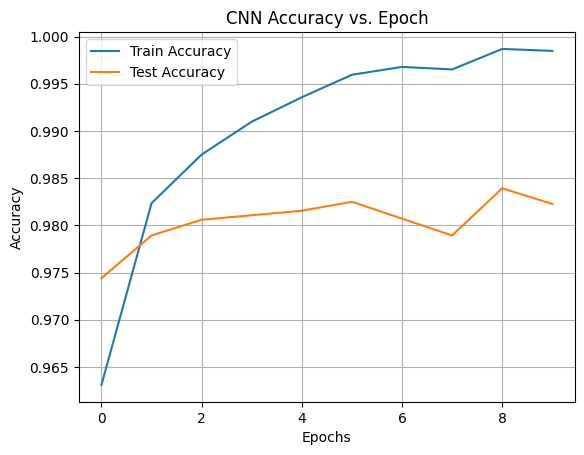

In [165]:
print(f"Test Accuracy: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy vs. Epoch')
plt.legend()
plt.grid()
plt.show()


210/210 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step


<Figure size 800x600 with 0 Axes>

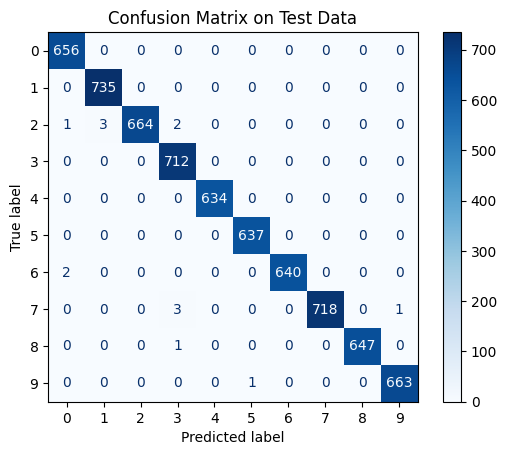

In [166]:
y_pred_test = model.predict(X_test)
y_pred_classes_test = np.argmax(y_pred_test, axis=1)
y_true_test = np.argmax(Y_test, axis=1)


cm_test = confusion_matrix(y_true_test, y_pred_classes_test)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix on Test Data")
plt.show()